In [1]:
import pandas as pd
import numpy as np
import datetime
!pip install pandas_summary
from pandas_summary import DataFrameSummary

In [98]:
df = pd.read_feather('/content/drive/MyDrive/Rossman 2.0/Data/train_normalized_data.fth')
df_test = pd.read_feather('/content/drive/MyDrive/Rossman 2.0/Data/test_normalized_data.fth')

In [99]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
len(df_train)/len(df), len(df_val)/len(df), len(df), len(df_val)

(0.9642465458145908, 0.035753454185409164, 844338, 30188)

In [100]:
df_train

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,State,file,week,trend,Date_y,Month_y,Day_y,file_DE,week_DE,trend_DE,Date_DE,State_DE,Month_DE,Day_DE,file_y,...,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,StateName,Year_y,Week_y,CompetitionDaysOpen,CompetitionMonthsOpen,Promo2Days,Promo2Weeks,StateHoliday_bool,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday_bool,BeforeStateHoliday_bool,AfterPromo,BeforePromo,SchoolHoliday_bw,StateHoliday_bool_bw,Promo_bw,SchoolHoliday_fw,StateHoliday_bool_fw,Promo_fw
0,1016447,352,1,2013-01-01,3139,820,1,-0.785400,1,2.144211,0,0,0,0,1,1,-0.554581,1,0,1,14,5,1,1990-01-15,2013-04-01,1,Rossmann_DE_BW,2013-01-06 - 2013-01-12,-0.548436,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,BadenWuerttemberg,...,-1.223006,3,1,-3,-0.036773,0.457947,0.054854,1016,1011,1008,31.0,12.0,10.0,0.036585,-0.995523,42.0,-0.215883,0.416347,1,228,BadenWuerttemberg,2013,1,8387,24,0,0,5.635633,0,0,-1.183596,1.072424,0,-6,1,1,0,4,2,1
1,1016429,334,1,2013-01-01,2401,482,1,-0.785400,1,2.144211,0,0,0,0,1,0,-0.649894,1,0,1,31,5,2,1990-01-15,2013-07-29,6,Rossmann_DE_NW,2013-01-06 - 2013-01-12,-0.195698,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,NordrheinWestfalen,...,-0.603784,7,5,1,0.092806,0.987991,0.768180,1013,1005,1001,31.0,12.0,4.0,1.826211,2.395924,58.0,1.714099,0.416347,10,215,NordrheinWestfalen,2013,1,8387,24,0,0,5.635633,0,0,-1.183596,1.072424,0,-6,1,1,0,4,1,1
2,1016606,511,1,2013-01-01,2646,625,1,-0.785400,1,2.144211,0,0,0,0,1,1,-0.591059,1,0,1,5,5,3,1990-01-15,2013-01-28,2,Rossmann_DE_BY,2013-01-06 - 2013-01-12,-0.812990,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,Bayern,...,-1.687422,3,-1,-5,0.870277,1.063712,0.564373,1014,1011,1010,10.0,9.0,5.0,0.036585,-0.995523,21.0,-0.315778,0.416347,1,240,Bayern,2013,1,8387,24,0,0,5.635633,0,0,-1.183596,1.072424,0,-6,1,1,0,4,2,1
3,1016588,493,1,2013-01-01,3113,527,1,-0.785400,1,2.144211,0,0,0,0,1,0,-0.512220,6,16,0,1,0,0,2011-06-15,1990-01-01,0,Rossmann_DE_BE,2013-01-06 - 2013-01-12,0.421593,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,Berlin,...,-0.139368,6,3,2,0.870277,0.306506,0.615325,1009,1004,1003,31.0,14.0,10.0,0.372140,1.039345,21.0,-0.012096,0.416347,10,216,Berlin,2013,1,566,18,8401,25,5.635633,0,0,-1.183596,1.072424,0,-6,1,1,0,4,1,1
4,1016624,529,1,2013-01-01,2907,532,1,-0.785400,1,2.144211,0,0,0,0,0,2,1.476405,1,0,0,1,0,0,1990-01-15,1990-01-01,8,Rossmann_DE_SH,2013-01-06 - 2013-01-12,0.597962,2013-01-06,1,6,Rossmann_DE,2013-01-06 - 2013-01-12,-0.440285,2013-01-06,None,1,6,SchleswigHolstein,...,0.015437,7,7,5,0.870277,1.593756,2.194834,1002,1000,999,10.0,8.0,5.0,0.036585,0.700200,21.0,-0.315778,0.416347,10,251,SchleswigHolstein,2013,1,8387,24,8401,25,5.635633,0,0,-1.183596,1.072424,0,-6,1,1,0,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814145,35308,743,1,2015-06-30,10915,1041,1,1.273237,0,-0.466372,2,5,26,29,0,0,-0.499276,12,16,1,40,6,2,2011-12-15,2014-09-29,2,Rossmann_DE_BY,2015-07-05 - 2015-07-11,0.333409,2015-07-05,7,5,Rossmann_DE,2015-07-05 - 2015-07-11,0.807334,2015-07-05,None,7,5,Bayern,...,0.944269,16,13,11,0.870

In [101]:
final_train = False

In [102]:
def get_metric(sales, sales_):
    return np.sqrt((((sales - sales_)/sales)**2).sum()/len(sales))


$\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}$


In [103]:
df_train.columns

Index(['index', 'Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Week',
       'Day', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionOpenSince', 'Promo2Since', 'State', 'file', 'week', 'trend',
       'Date_y', 'Month_y', 'Day_y', 'file_DE', 'week_DE', 'trend_DE',
       'Date_DE', 'State_DE', 'Month_DE', 'Day_DE', 'file_y',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressurehPa',
       'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'Max_Gust_SpeedKm_h',
       'Precipitatio

In [104]:
df_train['Events']

0          1
1         10
2          1
3         10
4         10
          ..
814145    20
814146    20
814147    20
814148    20
814149     0
Name: Events, Length: 814150, dtype: int64

In [105]:
max_sales = df_train['Sales'].max()
df.loc[:, 'Sales_norm'] = df['Sales'].values/max_sales

In [106]:
df_train.loc[:, 'Sales_norm'] = df_train['Sales'].values/max_sales
df_val.loc[:, 'Sales_norm'] = df_val['Sales'].values/max_sales

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [107]:
print('Train:')
print(get_metric(df_train['Sales_norm'], 
                 df_train['Sales_norm'].mean()))
print('Val:')
get_metric(df_val['Sales_norm'], 
           df_val['Sales_norm'].mean())

Train:
0.6371089378658716
Val:


0.5595617097594493

In [108]:
def get_mean_by_column(column, sales_str):
    group_means_dict = {}
    group_mean_list = []
    for col_value, group_df in df_train.groupby(column):
        group_mean =  group_df[group_df[sales_str] > 0][sales_str].mean()
        group_means_dict[col_value] = group_mean
        group_mean_list.append(group_mean)
    print('Train:', get_metric(df_train[sales_str], 
                               df_train[column].apply(group_means_dict.get)))
    print('Val:', get_metric(df_val[sales_str], 
                             df_val[column].apply(group_means_dict.get)))
    return group_means_dict, group_mean_list

In [109]:
# Media por store
_ = get_mean_by_column('Store', 'Sales_norm')

Train: 0.3960913521241833
Val: 0.3071746085338871


In [110]:
# Media por dia de la semana
_ = get_mean_by_column('DayOfWeek', 'Sales_norm')

Train: 0.6008874922754375
Val: 0.5061392186635418


In [111]:
# Media por numera de semana (1-52)
_ = get_mean_by_column('Week', 'Sales_norm')

Train: 0.6077405789213658
Val: 0.5171468581189791


In [112]:
_ = get_mean_by_column('Month', 'Sales_norm')

Train: 0.6326710739722277
Val: 0.5444650400703036


In [113]:
_ = get_mean_by_column('StateHoliday', 'Sales_norm')

Train: 0.637967104604855
Val: 0.5494193814701751


In [114]:
_ = get_mean_by_column('SchoolHoliday', 'Sales_norm')

Train: 0.6352131730794438
Val: 0.5522886254888323


In [115]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [116]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [117]:
def get_keras_LR(X_columns, hidden_units=1):
    inputs = []
    activation = 'linear'
    if hidden_units>1:
        activation = 'relu'
    for i, col in enumerate(X_columns):
        inp = Input(shape=(X_train[i].shape[1],), name=f"{col}_input")
        inputs.append(inp)
    if len(X_columns)>1:
        concat_out = Concatenate()(inputs)
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, name='Dense', activation=activation)(inputs[0])
    if hidden_units>1:
        dense_out = Dense(1, name='Dense_out')(dense_out)
    model = Model(inputs, dense_out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model


def get_embedings_NN(X_columns, hidden_units = 20, activation = 'relu'):
    embed_outs = []
    inputs = []
    for i, col in enumerate(X_columns):
        inp = Input(shape=(1,), name=f"{col}_input")
        inputs.append(inp)
        if col in embed_outs_dict:
            embed_out = Embedding(len(np.unique(X_train[i])), embed_outs_dict[col], name=f"{col}_embedding", mask_zero=False)(inp)
            out = Flatten(name=f"{col}_flatten")(embed_out)
            embed_outs.append(out)
        else:
            embed_outs.append(inp)
        
    if len(X_columns)>1:
        concat_out = Concatenate()(embed_outs)
        dense_out = Dense(hidden_units, activation=activation)(concat_out)
    else:
        dense_out = Dense(hidden_units, activation=activation)(out)
    out = Dense(1)(dense_out)
    model = Model(inputs, out)
    model.compile(optimizers.Adam(lr=0.0001), loss='mse', metrics=[rmspe, 'mse'])
    return model

In [118]:
with_embed = True

embed_outs_dict = {'Store': 2, 'DayOfWeek': 2} #,  'Week': 2, 'Month': 2}

X_columns = list(embed_outs_dict.keys())# + ['BeforeStateHoliday_bool', 'Max_TemperatureC'] # ['Precipitationmm']

if final_train:
    X_train = np.hsplit(df[X_columns].values, len(X_columns))
    y_train = df['Sales_norm']
else:
    X_train = np.hsplit(df_train[X_columns].values, len(X_columns))
    y_train = df_train['Sales_norm']
    
X_val = np.hsplit(df_val[X_columns].values, len(X_columns))
X_test = np.hsplit(df_test[X_columns].values, len(X_columns))

if not with_embed:
    for i in range(len(X_train)):
        X_train[i] = to_categorical(X_train[i])
        X_val[i] = to_categorical(X_val[i])
        X_test[i] = to_categorical(X_test[i])

y_val = df_val['Sales_norm']

In [128]:
df.shape

(844338, 83)

In [129]:
if with_embed:
    model = get_embedings_NN(X_columns)
else:
    model = get_keras_LR(X_columns, hidden_units=20)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Store_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
DayOfWeek_input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
Year_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
Month_input (InputLayer)        [(None, 1)]          0                                            
____________________________________________________________________________________________

In [130]:
# weights = model.get_weights()
# weights[0] = np.array(np.array(stores_mean_list).reshape(-1, 1))
# model.set_weights(weights)

In [131]:
from tensorflow.keras import callbacks

In [132]:
# model.evaluate(X_val, y_val)

In [133]:
# np.sqrt(0.0951)

In [134]:
epochs = 5
model.compile(optimizers.Adam(lr=0.001), loss='mse', metrics=[rmspe, 'mse'])
cbs = [callbacks.ReduceLROnPlateau(monitor='val_rmspe', mode='min', verbose=1, patience=2), callbacks.ModelCheckpoint('best_val_rmspe.hdf5', monitor='val_rmspe', mode='min', verbose=1, save_best_only=True)]
if final_train:
    model.fit(X_train, y_train, epochs=epochs, callbacks=cbs)
else:
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=cbs)

Epoch 1/5
26386/26386 [==============================] - 233s 9ms/step - loss: 9.6303e-04 - rmspe: 0.1949 - mse: 9.6303e-04

Epoch 00001: rmspe improved from inf to 0.15811, saving model to best_val_rmspe.hdf5
Epoch 2/5
26386/26386 [==============================] - 212s 8ms/step - loss: 4.2122e-04 - rmspe: 0.1307 - mse: 4.2122e-04

Epoch 00002: rmspe improved from 0.15811 to 0.12896, saving model to best_val_rmspe.hdf5
Epoch 3/5
26386/26386 [==============================] - 216s 8ms/step - loss: 3.8603e-04 - rmspe: 0.1240 - mse: 3.8603e-04

Epoch 00003: rmspe improved from 0.12896 to 0.12356, saving model to best_val_rmspe.hdf5
Epoch 4/5
26386/26386 [==============================] - 217s 8ms/step - loss: 3.6371e-04 - rmspe: 0.1212 - mse: 3.6371e-04

Epoch 00004: rmspe improved from 0.12356 to 0.12140, saving model to best_val_rmspe.hdf5
Epoch 5/5
26386/26386 [==============================] - 216s 8ms/step - loss: 3.5590e-04 - rmspe: 0.1205 - mse: 3.5590e-04

Epoch 00005: rmspe impr

In [135]:
model.load_weights('best_val_rmspe.hdf5')

In [136]:
model.evaluate(X_train, y_train)

26386/26386 [==============================] - 108s 4ms/step - loss: 4.2952e-04 - rmspe: 0.1309 - mse: 4.2952e-04


[0.00042951785144396126, 0.13094060122966766, 0.00042951785144396126]

In [138]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 4s 4ms/step - loss: 4.8106e-04 - rmspe: 0.1351 - mse: 4.8106e-04


[0.00048106099711731076, 0.13513928651809692, 0.00048106099711731076]

In [139]:
from matplotlib import pyplot as plt

In [140]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 2)


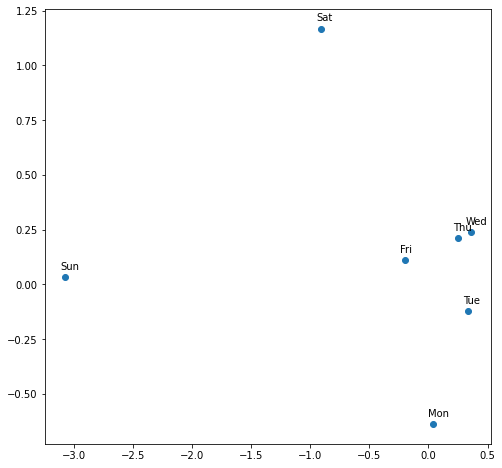

In [141]:
plot_embed('DayOfWeek_embedding', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])

(1115, 50)


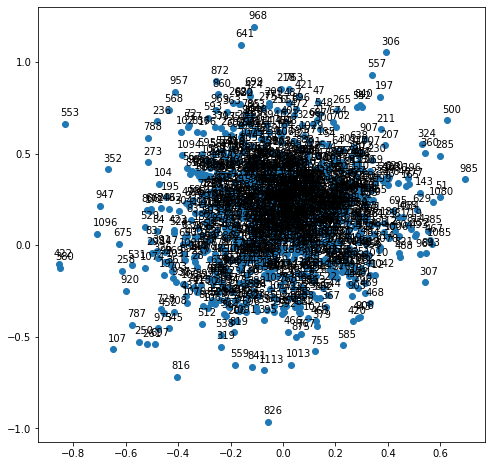

In [142]:
plot_embed('Store_embedding', list(range(1115)))

Store, DayOfWeek: 0.09212721139192581, 0.048540305346250534
Store, DayOfWeek, Week: 0.0615, 0.02256705053150654
Store, DayOfWeek, Week, Month: 0.061621, 0.02359057404100895

In [143]:
train_predictions.shape

(844338, 1)

In [147]:
train_predictions = model.predict(X_train)*max_sales
get_metric(df_train['Sales'].values, train_predictions.reshape(-1))

0.21000010885895695

In [148]:
train_predictions[1:5]

array([[4872.474 ],
       [2032.4443],
       [3802.5913],
       [3168.336 ]], dtype=float32)

In [149]:
df['Sales'][1:5]

1    2401
2    2646
3    3113
4    2907
Name: Sales, dtype: int64

In [ ]:
test_predictions = model.predict(X_test)*max_sales
test_predictions[df_test['Open'] == 0] = 0

In [ ]:
sample_csv = pd.read_csv('/content/drive/MyDrive/Rossman 2.0/Data/sample_submission.csv')
sample_csv['Sales'] = test_predictions
sample_csv.head()

sample_csv.to_csv(f'/content/drive/MyDrive/Rossman 2.0/Data/submision_baseline_{"-".join(X_columns)}.csv', index=False)


In [5]:
import pandas as pd
sample_csv = pd.read_csv('/content/drive/MyDrive/Rossman 2.0/Data/submision_lgbm.csv')
sample_csv.head()

,Id,Sales
0,1,5679.033256
1,2,6852.959354
2,3,5954.263998
3,4,4252.488849
4,5,8168.812193


In [10]:
sample_csv['Sales']=sample_csv.sort_values('Id', ascending=False)['Sales'].values

In [11]:
sample_csv

,Id,Sales
0,1,3537.950793
1,2,4252.976558
2,3,11510.637645
3,4,8864.023588
4,5,6112.156255
...,...,...
41083,41084,8168.812193
41084,41085,4252.488849
41085,41086,5954.263998
41086,41087,6852.959354


In [12]:
sample_csv.to_csv(f'/content/drive/MyDrive/Rossman 2.0/Data/submision_lgbm.csv', index=False)
